<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Gujarat/congressGujarat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
!git clone https://github.com/raishagun/Election-Prediction.git

fatal: destination path 'Election-Prediction' already exists and is not an empty directory.


In [161]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"congress gujarat"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('congress_gujarat.csv',index = False)

2020-11-21 20:08:47
1330241771146797064
False
@Shivaaye1990 @DrAbuAfzal1 @FaheemYounus Don’t ask me on religion things. I lived in Gujarat in 2002 and had many friends and family members living in Muslims dominated areas so I know what’s ground reality and what was presented by congress
vishalUthakkar
Atlanta, GA
Twitter for iPhone
0
300
1592
0
<--------------------------------------------------->
1
2020-11-21 19:58:19
1330239136016568322
False
@INCIndia Vaise kuch salo phele Gujarat me aake Dancer mummy ne 2 3 rs kg pe Dal Chaval aur Gehu dene ki Backwash ki thi lakin 2000 se Gujarati yo ne Congress ko Bola huwa he " Nikal Chor party Pheli Fursat me Nikal " 😂..... Afterall Nobody want Chinese Italian joint venture party 😂
kmd05007

Twitter for Android
0
9
170
0
<--------------------------------------------------->
2
2020-11-21 15:28:58
1330171350951014403
False
India demands probe into the Congress nexus with Maoists and terrorists on Mumbai 26/11 connected to 09/11 attacks in America

In [162]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       216 non-null    datetime64[ns]
 1   Tweet_id   216 non-null    int64         
 2   Verified   216 non-null    bool          
 3   Tweet      216 non-null    object        
 4   User       216 non-null    object        
 5   Location   216 non-null    object        
 6   Source     216 non-null    object        
 7   Likes      216 non-null    int64         
 8   Followers  216 non-null    int64         
 9   Following  216 non-null    int64         
 10  Retweets   216 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 17.2+ KB


In [164]:
df.shape

(216, 11)

In [165]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [166]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [167]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [168]:
df['Source'].value_counts()

Twitter for Android               115
Twitter Web App                    59
Twitter for iPhone                 29
TweetDeck                           5
Twitter Media Studio - LiveCut      2
Buffer                              1
Hootsuite Inc.                      1
ht-twitter-handler                  1
Instagram                           1
PTI_Tweets                          1
IFTTT                               1
Name: Source, dtype: int64

In [169]:
df['Location'].nunique()

107

In [170]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

216

In [171]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


216

In [172]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [173]:
df['Tweet'].duplicated().sum()

0

In [174]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(216, 11)

In [175]:
df['Tweet'].duplicated().sum()

0

In [176]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [177]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [178]:
df.shape

(216, 12)

In [179]:
df['Processed_Tweet']

0      @Shivaaye1990 @DrAbuAfzal1 @FaheemYounus Don’t...
1      @INCIndia Vaise kuch salo phele Gujarat me aak...
2      India demands probe into the Congress nexus wi...
3      @YRDeshmukh Congrats for exact predicting Biha...
4      @subhra2jyoti @reshma_alam9 See. In Gujarat, w...
                             ...                        
211    @softsto38135836 @rkmarar9 @judedavid21 Tell m...
212    @zafarsareshwala Zafar bhai U R right but not ...
213    Added a note of update to October 2 article af...
214    @radharaju18 Formula of M.P.&amp; Gujarat will...
215    @VamsiChandran @babu7472 Anti Modi voters simp...
Name: Processed_Tweet, Length: 216, dtype: object

In [180]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0      @Shivaaye1990 @DrAbuAfzal1 @FaheemYounus Don’t...
1      @INCIndia Vaise kuch salo phele Gujarat me aak...
2      India demands probe into the Congress nexus wi...
3      @YRDeshmukh Congrats for exact predicting Biha...
4      @subhra2jyoti @reshma_alam9 See. In Gujarat, w...
                             ...                        
211    @softsto38135836 @rkmarar9 @judedavid21 Tell m...
212    @zafarsareshwala Zafar bhai U R right but not ...
213    Added a note of update to October 2 article af...
214    @radharaju18 Formula of M.P.&amp; Gujarat will...
215    @VamsiChandran @babu7472 Anti Modi voters simp...
Name: Processed_Tweet, Length: 216, dtype: object

In [181]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0            Don’t ask me on religion things. I lived...
1        Vaise kuch salo phele Gujarat me aake Dancer...
2      India demands probe into the Congress nexus wi...
3        Congrats for exact predicting Bihar, Gujarat...
4          See. In Gujarat, we don't have any choice....
                             ...                        
211          Tell me the regional parties in Gujarat,...
212      Zafar bhai U R right but not 100% coz Muslim...
213    Added a note of update to October 2 article af...
214      Formula of M.P.&amp; Gujarat will be popular...
215        Anti Modi voters simply won’t vote for Paw...
Name: Processed_Tweet, Length: 216, dtype: object

In [182]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0            Don’t ask me on religion things. I lived...
1        Vaise kuch salo phele Gujarat me aake Dancer...
2      India demands probe into the Congress nexus wi...
3        Congrats for exact predicting Bihar, Gujarat...
4          See. In Gujarat, we don't have any choice....
                             ...                        
211          Tell me the regional parties in Gujarat,...
212      Zafar bhai U R right but not 100% coz Muslim...
213    Added a note of update to October 2 article af...
214      Formula of M.P.&amp; Gujarat will be popular...
215        Anti Modi voters simply won’t vote for Paw...
Name: Processed_Tweet, Length: 216, dtype: object

In [183]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0            Don’t ask me on religion things. I lived...
1        Vaise kuch salo phele Gujarat me aake Dancer...
2      India demands probe into the Congress nexus wi...
3        Congrats for exact predicting Bihar, Gujarat...
4          See. In Gujarat, we don't have any choice....
                             ...                        
211          Tell me the regional parties in Gujarat,...
212      Zafar bhai U R right but not 100% coz Muslim...
213    Added a note of update to October 2 article af...
214      Formula of M.P.&amp; Gujarat will be popular...
215        Anti Modi voters simply won’t vote for Paw...
Name: Processed_Tweet, Length: 216, dtype: object

In [184]:
!pip install tweet-preprocessor

In [185]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0      Dont ask me on religion things. I lived in Guj...
1      Vaise kuch salo phele Gujarat me aake Dancer m...
2      India demands probe into the Congress nexus wi...
3      Congrats for exact predicting Bihar, Gujarat, ...
4      See. In Gujarat, we don't have any choice. Con...
                             ...                        
211    Tell me the regional parties in Gujarat, MP, R...
212    Zafar bhai U R right but not % coz Muslims in ...
213    Added a note of update to October article afte...
214    Formula of M.P.&amp; Gujarat will be popular a...
215    Anti Modi voters simply wont vote for Pawar! E...
Name: Processed_Tweet, Length: 216, dtype: object

In [187]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0      Dont ask me on religion things  I lived in Guj...
1      Vaise kuch salo phele Gujarat me aake Dancer m...
2      India demands probe into the Congress nexus wi...
3      Congrats for exact predicting Bihar  Gujarat  ...
4      See  In Gujarat  we don t have any choice  Con...
                             ...                        
211    Tell me the regional parties in Gujarat  MP  R...
212    Zafar bhai U R right but not   coz Muslims in ...
213    Added a note of update to October article afte...
214    Formula of M P  amp  Gujarat will be popular a...
215    Anti Modi voters simply wont vote for Pawar  E...
Name: Processed_Tweet, Length: 216, dtype: object

In [188]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0      dont ask me on religion things  i lived in guj...
1      vaise kuch salo phele gujarat me aake dancer m...
2      india demands probe into the congress nexus wi...
3      congrats for exact predicting bihar  gujarat  ...
4      see  in gujarat  we don t have any choice  con...
                             ...                        
211    tell me the regional parties in gujarat  mp  r...
212    zafar bhai u r right but not   coz muslims in ...
213    added a note of update to october article afte...
214    formula of m p  amp  gujarat will be popular a...
215    anti modi voters simply wont vote for pawar  e...
Name: Processed_Tweet, Length: 216, dtype: object

In [189]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'india today  kapil sibal in up bypolls one candidate got around   votes  another   while another got around  in gujarat all candidates defected from congress to bjp and got  votes'

In [190]:
df['User'].value_counts()

Sanjeev26109683    7
TheQuint           3
Nakshtrajyotish    2
joBeeGeorgeous     2
AdityaMenon22      2
                  ..
ma14186314         1
JaideepKhedkar     1
shubhshaurya1      1
hitlervirus19      1
Jayrana20033       1
Name: User, Length: 196, dtype: int64

In [191]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


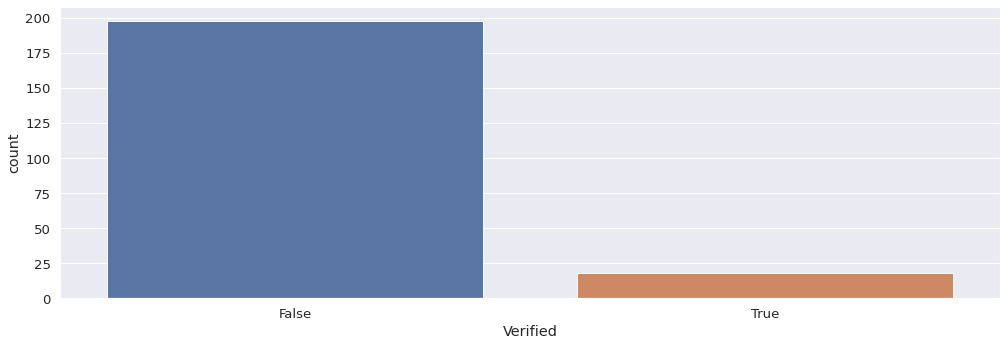

In [192]:
bar = sns.countplot(df['Verified'])

In [193]:
df['Verified'].value_counts()

False    198
True      18
Name: Verified, dtype: int64

In [194]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

TheQuint           3
AdityaMenon22      2
utkarsh_aanand     1
sunetrac           1
tv9gujarati        1
IamNaveenKapoor    1
PTI_News           1
htTweets           1
ttindia            1
semubhatt          1
tathagata2         1
ANI                1
HindustanTimes     1
ndtv               1
DebayanDictum      1
Name: User, dtype: int64

In [195]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 7, 16: 49, 17: 29, 18: 30, 19: 38, 20: 34, 21: 29})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

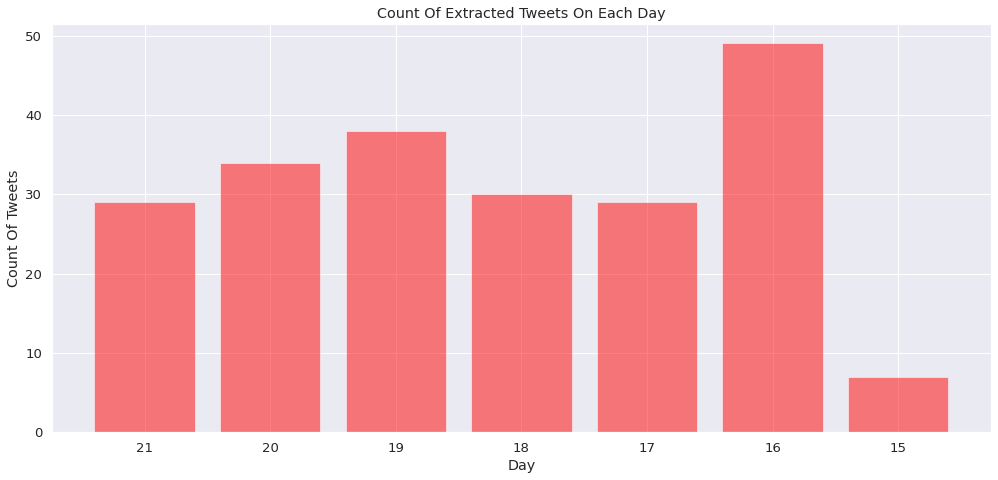

In [196]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [197]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 3,
         1: 2,
         2: 7,
         3: 13,
         4: 7,
         5: 13,
         6: 5,
         7: 18,
         8: 17,
         9: 14,
         10: 9,
         11: 13,
         12: 9,
         13: 20,
         14: 18,
         15: 9,
         16: 7,
         17: 6,
         18: 5,
         19: 8,
         20: 6,
         21: 2,
         22: 4,
         23: 1})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

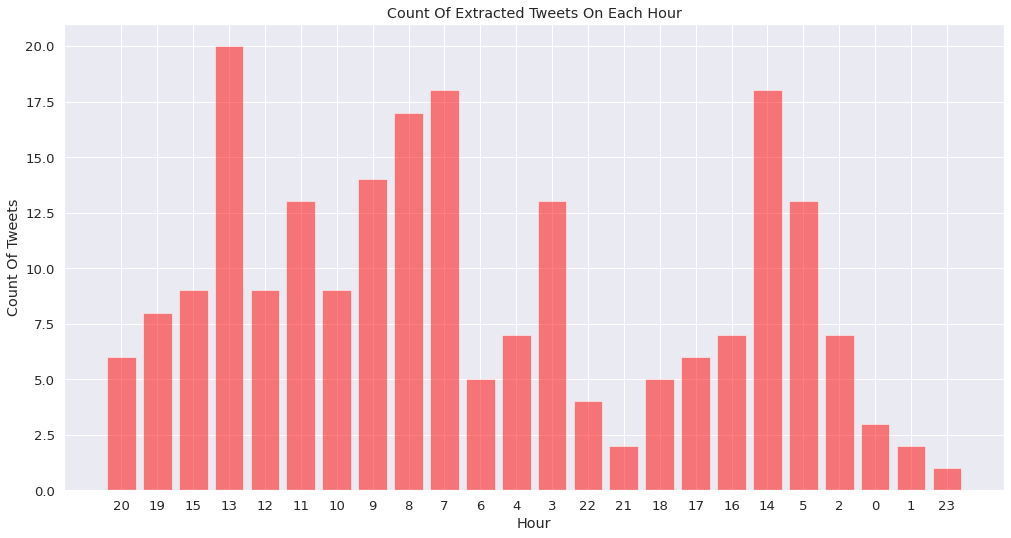

In [198]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [199]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [200]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [201]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['who', 'below', 'then', 'any', 'we', "it's", 'did', 'has', 'as', 'over', 'your', 'against', 'is', 'its', 'mightn', 'in', 'before', 'that', 'won', 'didn', 'while', 'here', 'because', 'should', 'ourselves', "shan't", "couldn't", 'from', 'to', 've', 'they', 'for', 'couldn', 'our', 'other', 'ain', 'each', 'only', 'i', "mustn't", 'above', 'same', 'doesn', 'or', 'themselves', 're', 'it', "she's", "isn't", 's', 'a', 'does', 'out', 'll', 'about', 'during', "should've", 'mustn', "that'll", 'than', 'which', 'doing', 'not', 'she', 'o', 'some', "hadn't", 'and', 'his', 'have', 'can', 'all', 'under', 'himself', "wasn't", 'how', "hasn't", 'itself', 'at', 'once', "doesn't", 'weren', 'just', 'by', 'after', 'he', 'ours', 'theirs', 'y', 'an', 'you', 'yours', 'shouldn', 'yourself', 'been', 'being', 'were', "aren't", 'off', 'into', 'me', 'herself', 'will', "needn't", 'this', 'was', 'aren', 'are', 'what', "you'd", "weren't", 'with', 'so', 'needn', 'be', "don't", 'too', 'these', 't', 'on', 'them', 'between'

In [202]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0      dont ask religion things lived gujarat many fr...
1      vaise kuch salo phele gujarat aake dancer mumm...
2      india demands probe congress nexus maoists ter...
3      congrats exact predicting bihar gujarat karnat...
4      see gujarat choice congress ground leaders bjp...
                             ...                        
211    tell regional parties gujarat mp rajasthan utt...
212    zafar bhai u r right coz muslims gujarat good ...
213    added note update october article latest polls...
214    formula p gujarat popular among congress party...
215    anti modi voters simply wont vote pawar even c...
Name: Processed_Tweet, Length: 216, dtype: object

In [203]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [dont, ask, religion, things, lived, gujarat, ...
1      [vaise, kuch, salo, phele, gujarat, aake, danc...
2      [india, demands, probe, congress, nexus, maois...
3      [congrats, exact, predicting, bihar, gujarat, ...
4      [see, gujarat, choice, congress, ground, leade...
                             ...                        
211    [tell, regional, parties, gujarat, mp, rajasth...
212    [zafar, bhai, u, r, right, coz, muslims, gujar...
213    [added, note, update, october, article, latest...
214    [formula, p, gujarat, popular, among, congress...
215    [anti, modi, voters, simply, wont, vote, pawar...
Name: Processed_Tweet, Length: 216, dtype: object

In [204]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [dont, ask, religion, thing, live, gujarat, ma...
1      [vais, kuch, salo, phele, gujarat, aak, dancer...
2      [india, demand, probe, congress, nexu, maoist,...
3      [congrat, exact, predict, bihar, gujarat, karn...
4      [see, gujarat, choic, congress, ground, leader...
                             ...                        
211    [tell, region, parti, gujarat, mp, rajasthan, ...
212    [zafar, bhai, u, r, right, coz, muslim, gujara...
213    [ad, note, updat, octob, articl, latest, poll,...
214    [formula, p, gujarat, popular, among, congress...
215    [anti, modi, voter, simpli, wont, vote, pawar,...
Name: Processed_Tweet, Length: 216, dtype: object

In [205]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 20:08:47,1330241771146797064,False,@Shivaaye1990 @DrAbuAfzal1 @FaheemYounus Don’t...,vishalUthakkar,"Atlanta, GA",Twitter for iPhone,0,300,1592,0,"[dont, ask, religion, thing, live, gujarat, ma..."
1,2020-11-21 19:58:19,1330239136016568322,False,@INCIndia Vaise kuch salo phele Gujarat me aak...,kmd05007,,Twitter for Android,0,9,170,0,"[vais, kuch, salo, phele, gujarat, aak, dancer..."
2,2020-11-21 15:28:58,1330171350951014403,False,India demands probe into the Congress nexus wi...,jyothijonnala28,"Ahmedabad, Gujarat India",Twitter Web App,0,20,261,0,"[india, demand, probe, congress, nexu, maoist,..."
3,2020-11-21 15:25:48,1330170557539774467,False,@YRDeshmukh Congrats for exact predicting Biha...,uddayshya,DELHI,Twitter Web App,0,50,838,0,"[congrat, exact, predict, bihar, gujarat, karn..."
4,2020-11-21 13:42:52,1330144651693723649,False,"@subhra2jyoti @reshma_alam9 See. In Gujarat, w...",nisargdhamecha7,"राजकोट, भारत",Twitter for Android,0,546,1856,0,"[see, gujarat, choic, congress, ground, leader..."
...,...,...,...,...,...,...,...,...,...,...,...,...
211,2020-11-15 16:08:59,1328007096789463041,False,@softsto38135836 @rkmarar9 @judedavid21 Tell m...,mukeshmarda,coimbatore,Twitter for Android,2,2603,3846,4,"[tell, region, parti, gujarat, rajasthan, utta..."
212,2020-11-15 14:45:31,1327986089009836032,False,@zafarsareshwala Zafar bhai U R right but not ...,mfoohuazmimyead,ATMANIRBHAR JOKER,Twitter for iPhone,1,1158,1159,0,"[zafar, bhai, right, coz, muslim, gujarat, goo..."
213,2020-11-15 14:17:29,1327979034689507328,False,Added a note of update to October 2 article af...,JapanPathak,"Gujarat, India",TweetDeck,1,4224,329,1,"[note, updat, octob, articl, latest, poll, res..."
214,2020-11-15 13:13:19,1327962889144045568,False,@radharaju18 Formula of M.P.&amp; Gujarat will...,mahendrapoza,India,Twitter for iPhone,0,161,118,0,"[formula, gujarat, popular, among, congress, p..."


In [206]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

3999

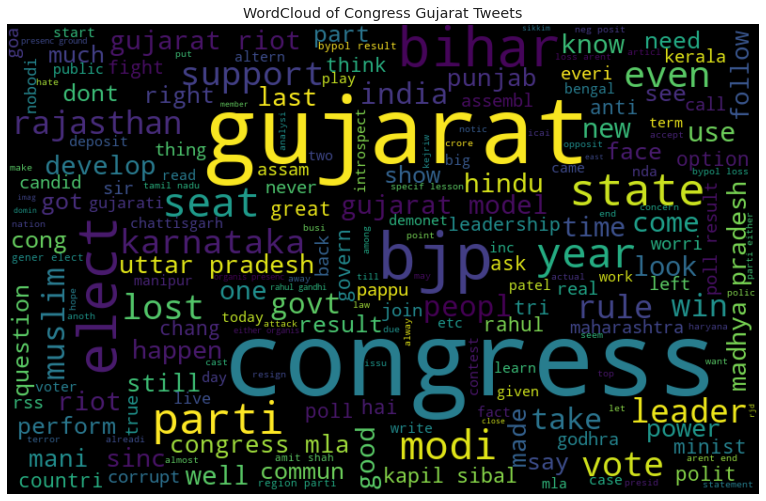

In [207]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of Congress Gujarat Tweets")
plt.show()

In [208]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

216

In [209]:
len(text)

3999

In [210]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 108
Negative Tweets: 40
Neutral Tweets 68


In [211]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [212]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

In [213]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,0.856,0.144,0.4939
1,0.000,0.962,0.038,0.0772
2,0.354,0.646,0.000,-0.8519
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
211,0.224,0.717,0.058,-0.5719
212,0.108,0.789,0.104,-0.0258
213,0.080,0.797,0.123,0.3182
214,0.000,0.577,0.423,0.7650


In [214]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,0.856,0.144,0.4939,Positive
1,0.000,0.962,0.038,0.0772,Positive
2,0.354,0.646,0.000,-0.8519,Negative
3,0.000,1.000,0.000,0.0000,Neutral
4,0.000,1.000,0.000,0.0000,Neutral


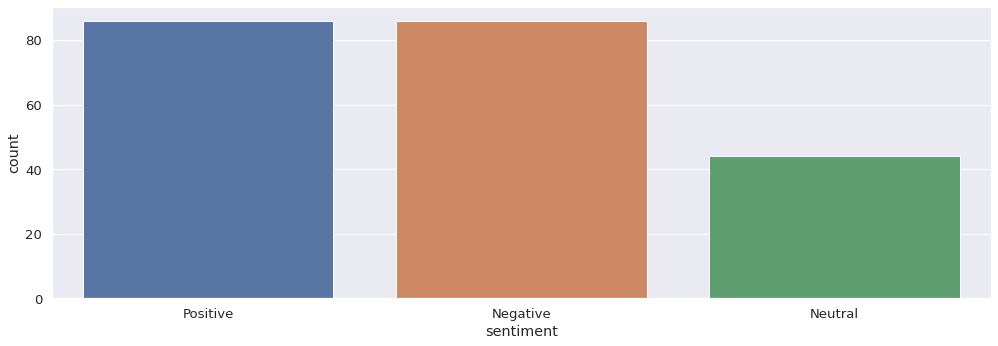

In [215]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [216]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Gujarat/congress_gujarat.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

362

In [217]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [218]:
word_emotion=dict()
for i in range(0,385):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


KeyError: ignored

In [219]:
from numpy import nan
nan == nan


False

In [220]:
for i in range(0,1202):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [221]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

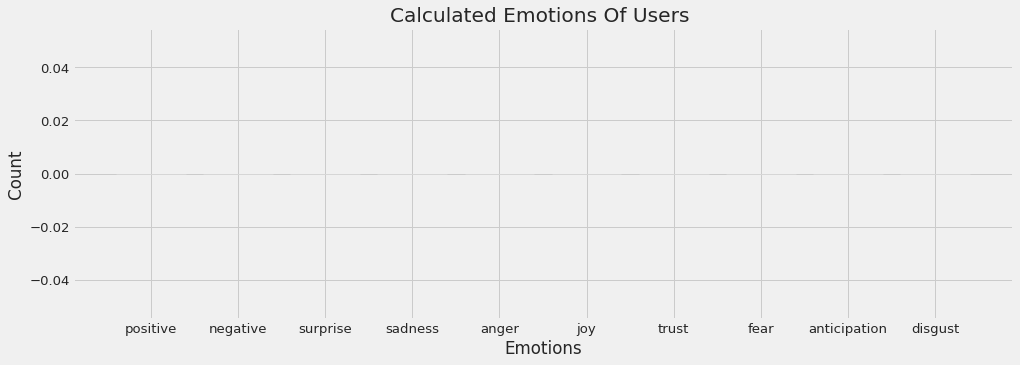

In [222]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [223]:
df.Location  = df.Location.fillna('INDIA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [224]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                     67
India                16
Kolkata, India        5
Mumbai                5
Mumbai, India         4
                     ..
Kozhikode, India      1
Mumbai,India          1
Karimnagar, India     1
Austin, TX            1
Chennai, India        1
Name: Location, Length: 106, dtype: int64

In [225]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 20:08:47,1330241771146797064,False,@Shivaaye1990 @DrAbuAfzal1 @FaheemYounus Don’t...,vishalUthakkar,"Atlanta, GA",Twitter for iPhone,0,300,1592,0,"[dont, ask, religion, thing, live, gujarat, ma...",Atlanta
1,2020-11-21 19:58:19,1330239136016568322,False,@INCIndia Vaise kuch salo phele Gujarat me aak...,kmd05007,,Twitter for Android,0,9,170,0,"[vais, kuch, salo, phele, gujarat, aak, dancer...",
2,2020-11-21 15:28:58,1330171350951014403,False,India demands probe into the Congress nexus wi...,jyothijonnala28,"Ahmedabad, Gujarat India",Twitter Web App,0,20,261,0,"[india, demand, probe, congress, nexu, maoist,...",Ahmedabad
3,2020-11-21 15:25:48,1330170557539774467,False,@YRDeshmukh Congrats for exact predicting Biha...,uddayshya,DELHI,Twitter Web App,0,50,838,0,"[congrat, exact, predict, bihar, gujarat, karn...",DELHI
4,2020-11-21 13:42:52,1330144651693723649,False,"@subhra2jyoti @reshma_alam9 See. In Gujarat, w...",nisargdhamecha7,"राजकोट, भारत",Twitter for Android,0,546,1856,0,"[see, gujarat, choic, congress, ground, leader...",राजकोट
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2020-11-15 16:08:59,1328007096789463041,False,@softsto38135836 @rkmarar9 @judedavid21 Tell m...,mukeshmarda,coimbatore,Twitter for Android,2,2603,3846,4,"[tell, region, parti, gujarat, rajasthan, utta...",coimbatore
212,2020-11-15 14:45:31,1327986089009836032,False,@zafarsareshwala Zafar bhai U R right but not ...,mfoohuazmimyead,ATMANIRBHAR JOKER,Twitter for iPhone,1,1158,1159,0,"[zafar, bhai, right, coz, muslim, gujarat, goo...",ATMANIRBHAR JOKER
213,2020-11-15 14:17:29,1327979034689507328,False,Added a note of update to October 2 article af...,JapanPathak,"Gujarat, India",TweetDeck,1,4224,329,1,"[note, updat, octob, articl, latest, poll, res...",Gujarat
214,2020-11-15 13:13:19,1327962889144045568,False,@radharaju18 Formula of M.P.&amp; Gujarat will...,mahendrapoza,India,Twitter for iPhone,0,161,118,0,"[formula, gujarat, popular, among, congress, p...",India


In [227]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [228]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 20:08:47,1330241771146797064,False,@Shivaaye1990 @DrAbuAfzal1 @FaheemYounus Don’t...,vishalUthakkar,"Atlanta, GA",Twitter for iPhone,0,300,1592,0,"[dont, ask, religion, thing, live, gujarat, ma...",Atlanta,Positive,21
1,2020-11-21 19:58:19,1330239136016568322,False,@INCIndia Vaise kuch salo phele Gujarat me aak...,kmd05007,,Twitter for Android,0,9,170,0,"[vais, kuch, salo, phele, gujarat, aak, dancer...",,Positive,21
2,2020-11-21 15:28:58,1330171350951014403,False,India demands probe into the Congress nexus wi...,jyothijonnala28,"Ahmedabad, Gujarat India",Twitter Web App,0,20,261,0,"[india, demand, probe, congress, nexu, maoist,...",Ahmedabad,Negative,21
3,2020-11-21 15:25:48,1330170557539774467,False,@YRDeshmukh Congrats for exact predicting Biha...,uddayshya,DELHI,Twitter Web App,0,50,838,0,"[congrat, exact, predict, bihar, gujarat, karn...",DELHI,Neutral,21
4,2020-11-21 13:42:52,1330144651693723649,False,"@subhra2jyoti @reshma_alam9 See. In Gujarat, w...",nisargdhamecha7,"राजकोट, भारत",Twitter for Android,0,546,1856,0,"[see, gujarat, choic, congress, ground, leader...",राजकोट,Neutral,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


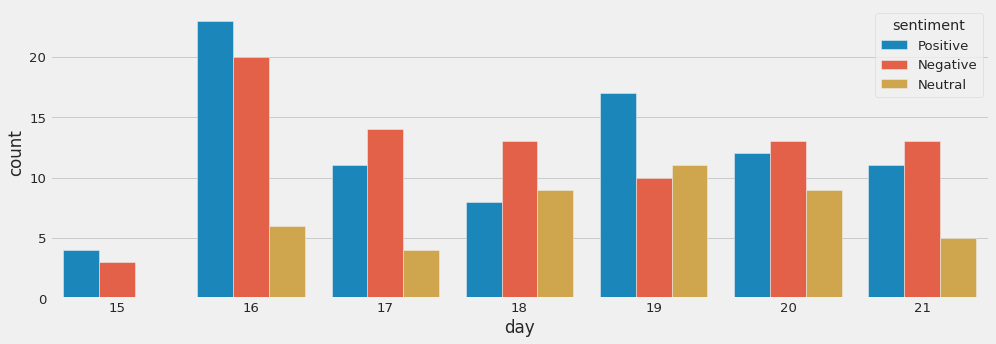

In [229]:
sns.countplot(df['day'],hue = df['sentiment'])

In [230]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [231]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 20:08:47,1330241771146797064,False,@Shivaaye1990 @DrAbuAfzal1 @FaheemYounus Don’t...,vishalUthakkar,"Atlanta, GA",Twitter for iPhone,0,300,1592,0,"[dont, ask, religion, thing, live, gujarat, ma...",Atlanta,Positive,21,2
1,2020-11-21 19:58:19,1330239136016568322,False,@INCIndia Vaise kuch salo phele Gujarat me aak...,kmd05007,,Twitter for Android,0,9,170,0,"[vais, kuch, salo, phele, gujarat, aak, dancer...",,Positive,21,2
2,2020-11-21 15:28:58,1330171350951014403,False,India demands probe into the Congress nexus wi...,jyothijonnala28,"Ahmedabad, Gujarat India",Twitter Web App,0,20,261,0,"[india, demand, probe, congress, nexu, maoist,...",Ahmedabad,Negative,21,0
3,2020-11-21 15:25:48,1330170557539774467,False,@YRDeshmukh Congrats for exact predicting Biha...,uddayshya,DELHI,Twitter Web App,0,50,838,0,"[congrat, exact, predict, bihar, gujarat, karn...",DELHI,Neutral,21,1
4,2020-11-21 13:42:52,1330144651693723649,False,"@subhra2jyoti @reshma_alam9 See. In Gujarat, w...",nisargdhamecha7,"राजकोट, भारत",Twitter for Android,0,546,1856,0,"[see, gujarat, choic, congress, ground, leader...",राजकोट,Neutral,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2020-11-15 16:08:59,1328007096789463041,False,@softsto38135836 @rkmarar9 @judedavid21 Tell m...,mukeshmarda,coimbatore,Twitter for Android,2,2603,3846,4,"[tell, region, parti, gujarat, rajasthan, utta...",coimbatore,Negative,15,0
212,2020-11-15 14:45:31,1327986089009836032,False,@zafarsareshwala Zafar bhai U R right but not ...,mfoohuazmimyead,ATMANIRBHAR JOKER,Twitter for iPhone,1,1158,1159,0,"[zafar, bhai, right, coz, muslim, gujarat, goo...",ATMANIRBHAR JOKER,Negative,15,0
213,2020-11-15 14:17:29,1327979034689507328,False,Added a note of update to October 2 article af...,JapanPathak,"Gujarat, India",TweetDeck,1,4224,329,1,"[note, updat, octob, articl, latest, poll, res...",Gujarat,Positive,15,2
214,2020-11-15 13:13:19,1327962889144045568,False,@radharaju18 Formula of M.P.&amp; Gujarat will...,mahendrapoza,India,Twitter for iPhone,0,161,118,0,"[formula, gujarat, popular, among, congress, p...",India,Positive,15,2


In [232]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [234]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [235]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [236]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.35384615384615387
Precision Score:  0.35384615384615387
Recall Score:  0.35384615384615387
F1 Score:  0.35384615384615387


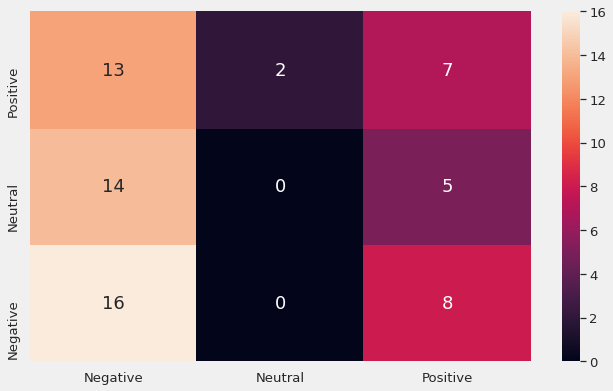

In [237]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [238]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [239]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [240]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.5029166666666666
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [241]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.4
Precision Score:  0.4
Recall Score:  0.4
F1 Score:  0.4000000000000001


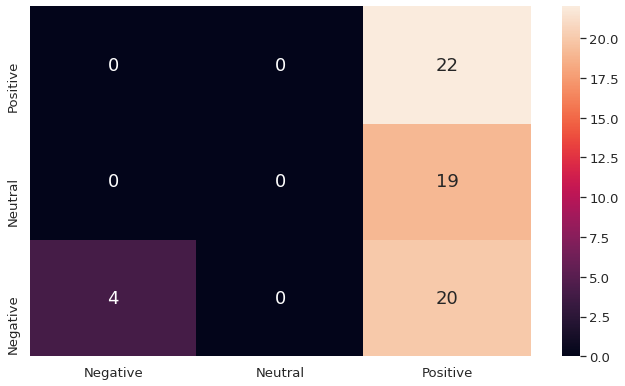

In [242]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [243]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [244]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.4461538461538462
Precision Score:  0.4461538461538462
Recall Score:  0.4461538461538462
F1 Score:  0.4461538461538462


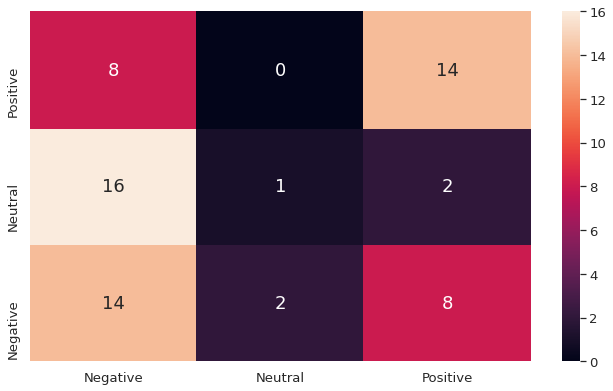

In [245]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [246]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [247]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1100, max_depth=19, criterion=gini .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1100, max_depth=19, criterion=gini, score=0.548, total=   1.9s
[CV] n_estimators=1100, max_depth=19, criterion=gini .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=19, criterion=gini, score=0.600, total=   1.9s
[CV] n_estimators=1100, max_depth=19, criterion=gini .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=19, criterion=gini, score=0.700, total=   1.9s
[CV] n_estimators=1100, max_depth=19, criterion=gini .................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.8s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=19, criterion=gini, score=0.467, total=   1.9s
[CV] n_estimators=1100, max_depth=19, criterion=gini .................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.7s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=19, criterion=gini, score=0.733, total=   1.9s
[CV] n_estimators=1300, max_depth=13, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.6s remaining:    0.0s


[CV]  n_estimators=1300, max_depth=13, criterion=entropy, score=0.581, total=   2.2s
[CV] n_estimators=1300, max_depth=13, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.8s remaining:    0.0s


[CV]  n_estimators=1300, max_depth=13, criterion=entropy, score=0.633, total=   2.2s
[CV] n_estimators=1300, max_depth=13, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   14.1s remaining:    0.0s


[CV]  n_estimators=1300, max_depth=13, criterion=entropy, score=0.667, total=   2.3s
[CV] n_estimators=1300, max_depth=13, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   16.3s remaining:    0.0s


[CV]  n_estimators=1300, max_depth=13, criterion=entropy, score=0.433, total=   2.2s
[CV] n_estimators=1300, max_depth=13, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   18.6s remaining:    0.0s


[CV]  n_estimators=1300, max_depth=13, criterion=entropy, score=0.667, total=   2.2s
[CV] n_estimators=600, max_depth=5, criterion=entropy ................
[CV]  n_estimators=600, max_depth=5, criterion=entropy, score=0.581, total=   0.9s
[CV] n_estimators=600, max_depth=5, criterion=entropy ................
[CV]  n_estimators=600, max_depth=5, criterion=entropy, score=0.533, total=   0.9s
[CV] n_estimators=600, max_depth=5, criterion=entropy ................
[CV]  n_estimators=600, max_depth=5, criterion=entropy, score=0.600, total=   0.9s
[CV] n_estimators=600, max_depth=5, criterion=entropy ................
[CV]  n_estimators=600, max_depth=5, criterion=entropy, score=0.467, total=   1.0s
[CV] n_estimators=600, max_depth=5, criterion=entropy ................
[CV]  n_estimators=600, max_depth=5, criterion=entropy, score=0.633, total=   0.8s
[CV] n_estimators=300, max_depth=4, criterion=gini ...................
[CV]  n_estimators=300, max_depth=4, criterion=gini, score=0.581, total=  

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


0.6096774193548387
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 19, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [248]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.4153846153846154
Precision Score:  0.4153846153846154
Recall Score:  0.4153846153846154
F1 Score:  0.4153846153846154


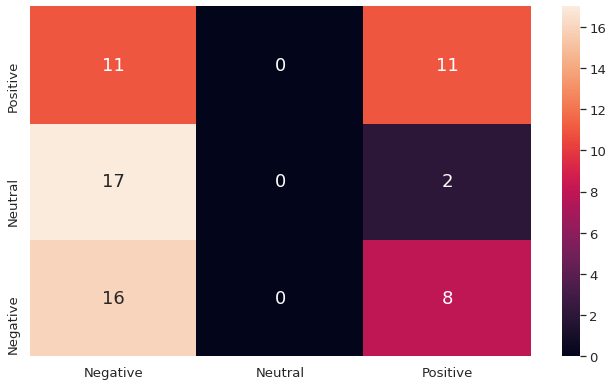

In [249]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [250]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.47692307692307695
Precision Score:  0.47692307692307695
Recall Score:  0.47692307692307695
F1 Score:  0.47692307692307695


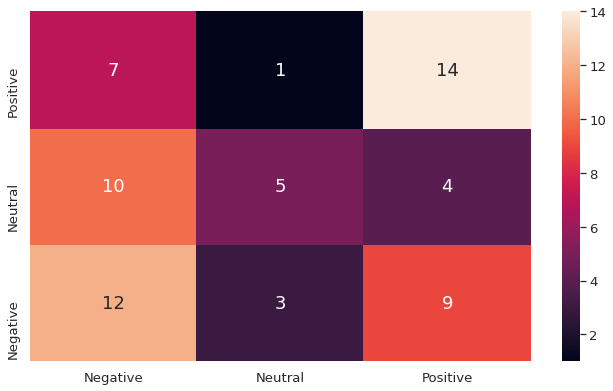

In [251]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [252]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [253]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.5625
{'alpha': 4, 'class_prior': None, 'fit_prior': True}


In [254]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.4307692307692308
Precision Score:  0.4307692307692308
Recall Score:  0.4307692307692308
F1 Score:  0.43076923076923074


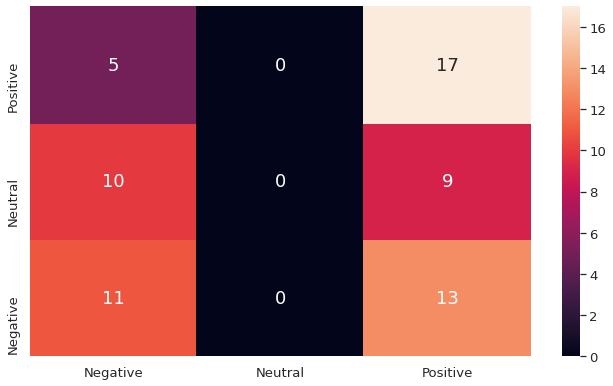

In [255]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

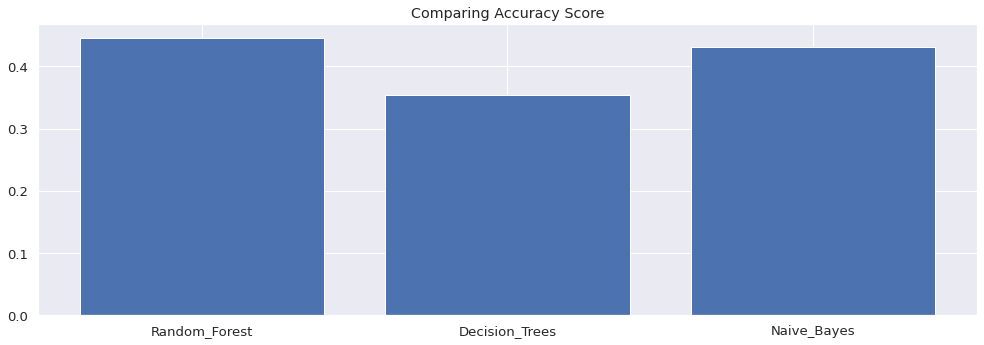

In [256]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

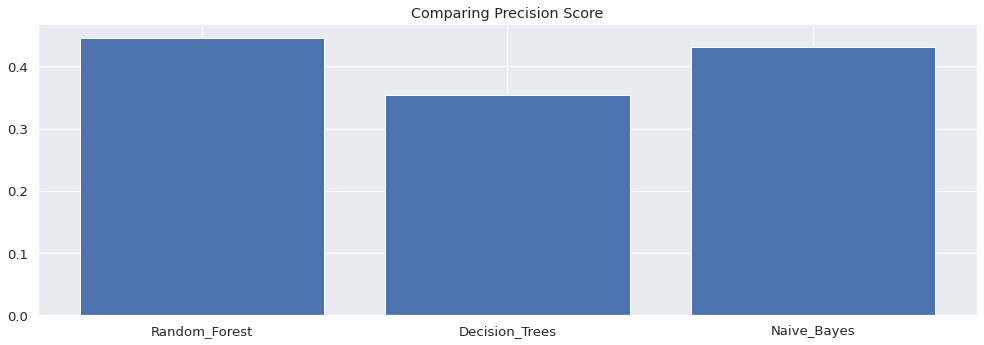

In [257]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

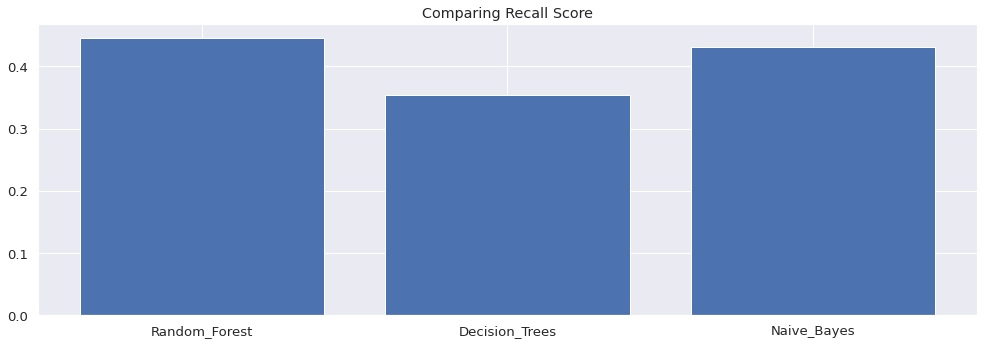

In [258]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

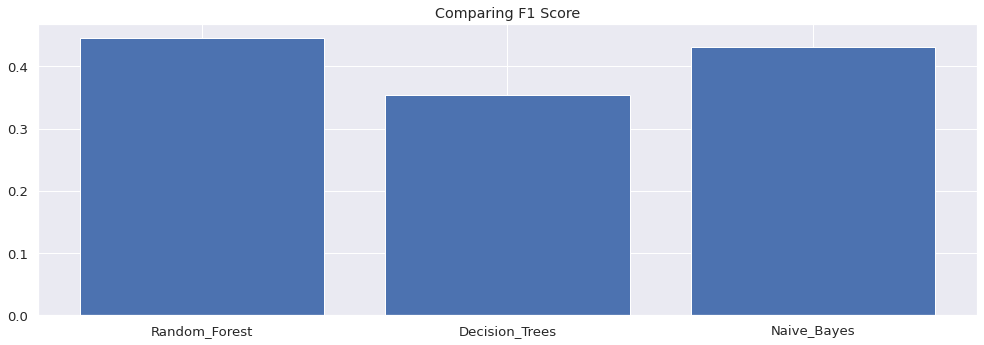

In [259]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()